In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tickers = ['TSLA']
data = pd.DataFrame()
start_date = '2018-9-1'
end_date = '2020-8-31'
for t in tickers:
    data[t] = wb.DataReader(t,data_source='yahoo', start=start_date, end=end_date)['Adj Close']

In [4]:
log_returns = np.log(1+data.pct_change())

In [5]:
r=0.025

In [7]:
stdev = log_returns.std()*250**0.5
stdev

TSLA    0.706134
dtype: float64

In [9]:
type(stdev)

pandas.core.series.Series

In [10]:
stdev = stdev.values
stdev

array([0.70613431])

In [11]:
T =1.0
t_intervals = 250
delta_t = T/t_intervals
iterations =10000 

In [12]:
Z = np.random.standard_normal((t_intervals+1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0]=S0

In [13]:
for t in range(1,t_intervals+1):
    S[t] = S[t-1]*np.exp((r-0.5*stdev**2)*delta_t + stdev*np.sqrt(delta_t)*Z[t])
S

array([[ 498.32000732,  498.32000732,  498.32000732, ...,  498.32000732,
         498.32000732,  498.32000732],
       [ 475.9153478 ,  489.94644798,  493.83106437, ...,  505.19399124,
         482.84719246,  569.50161283],
       [ 478.84052863,  454.70332878,  485.66458284, ...,  508.80771279,
         500.05669302,  511.59631653],
       ...,
       [ 282.45363824, 1145.30196827, 1425.08632406, ...,  230.22546644,
         385.55277381,  788.0557237 ],
       [ 294.68255118, 1206.70761756, 1441.44131493, ...,  239.03994176,
         395.35877934,  813.10739426],
       [ 277.08852615, 1199.22140086, 1502.67226409, ...,  244.91622446,
         393.7683152 ,  747.05192502]])

In [14]:
S.shape

(251, 10000)

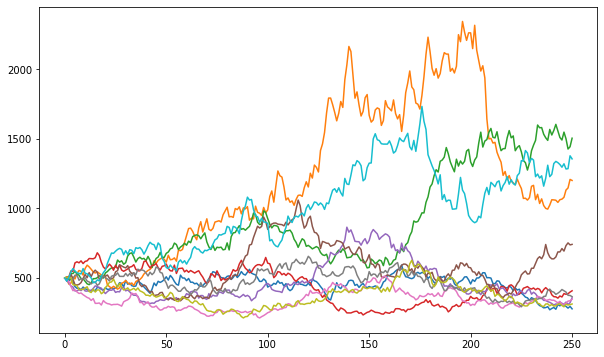

In [15]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])

In [16]:
p = np.maximum(S[-1]-600,0)
p

array([  0.        , 599.22140086, 902.67226409, ...,   0.        ,
         0.        , 147.05192502])

In [17]:
p.shape

(10000,)

In [18]:
c = np.exp(-r*T)*np.sum(p)/iterations
c

107.99704109772672